# **Coding Task 2 | Algorithms 2023 | EC31205**
#### Submitted by Irsh Vijay | 21EC30025
****
### **Part A: Find the Edit Distance Matrix**


In [1]:
from utils import load_dataset, plot_Graph

scanpath_dataset = load_dataset(filename = "scanpath_dataset.pickle")

In [2]:
h = scanpath_dataset["height"]
w = scanpath_dataset["width"]
total = scanpath_dataset["total_subjects"]

In [14]:
def reencode_scanpath(scanpath, grid_size):
  reencoded_array = []
  grid_size_x = w//grid_size
  grid_size_y = h//grid_size
  for point_x, point_y in scanpath:
    reencoded_array.append(int(point_x/w*grid_size_x)+int(point_y/h*grid_size_y)*(grid_size_x))
  return reencoded_array

In [15]:
def get_all_pair_edit_distances(scanpath_dataset, grid_size):
  distance_matrix = []
  for rows in range(total):
    distance_matrix.append([0]*total)

  #Your code here to fill distance_matrix

  for i in range(total):
    for j in range(i, total):
      scanpath_i = reencode_scanpath(scanpath_dataset[i], grid_size)
      scanpath_j = reencode_scanpath(scanpath_dataset[j], grid_size)

      def get_edit_distance(scanpath1, scanpath2):
        len1 = len(scanpath1)
        len2 = len(scanpath2)

        dp = [[0] * (len2 + 1) for _ in range(len1 + 1)]

        for i in range(len1 + 1):
          dp[i][0] = i
        for j in range(len2 + 1):
          dp[0][j] = j

        for i in range(1, len1 + 1):
          for j in range(1, len2 + 1):
            cost = 0 if scanpath1[i - 1] == scanpath2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,
                dp[i][j - 1] + 1,
                dp[i - 1][j - 1] + cost
            )

        return dp[len1][len2]

      distance = get_edit_distance(scanpath_i, scanpath_j)

      distance_matrix[i][j] = distance
      distance_matrix[j][i] = distance

  # Your code ends here
  return distance_matrix

In [64]:
# Change grid_size here
grid_size = 32 # @param {type:"slider", min:1, max:64, step:1}
edit_distance_matrix = get_all_pair_edit_distances(scanpath_dataset, grid_size)

****
### **Part B: Use Prims MST Algorithm**
****

In [65]:
def prim_mst(distance_matrix):
  n = len(distance_matrix)
  visited = [False] * n
  mst = []

  visited[0] = True

  while len(mst) < n - 1:
    min_edge = None
    min_weight = float('inf')

    for u in range(n):
      if visited[u]:
        for v in range(n):
          if not visited[v] and distance_matrix[u][v] < min_weight:
            min_edge = (u, v, distance_matrix[u][v])
            min_weight = distance_matrix[u][v]

    u, v, weight = min_edge
    mst.append((u, v, weight))
    visited[v] = True

  return mst

In [66]:
mst_edge_list = prim_mst(edit_distance_matrix)

In [67]:
mst_edge_list_temp = [edge_info for edge_info in mst_edge_list]
mst_edge_list_temp.sort(key=lambda edge: edge[2])
print("Length of MST Edge List: ", len(mst_edge_list_temp))
largest_edge = mst_edge_list_temp.pop()
print("Largest Edge: ", largest_edge[2])

_ = mst_edge_list.pop(mst_edge_list.index(largest_edge))

Length of MST Edge List:  22
Largest Edge:  23


In [68]:
def label_components(mst_edge_list, n):
  graph = [[] for _ in range(n)]
  for u, v, _ in mst_edge_list:
    graph[u].append(v)
    graph[v].append(u)

  node_labels = [None] * n

  def bfs(node, label):
    queue = [node]
    while queue:
      current_node = queue.pop(0)
      node_labels[current_node] = label
      for neighbor in graph[current_node]:
        if node_labels[neighbor] is None:
          queue.append(neighbor)

  for i in range(n):
    if node_labels[i] is None:
      bfs(i, 'blue' if i == 0 else 'red')

  return node_labels

n = len(edit_distance_matrix)
node_labels = label_components(mst_edge_list, n)


Total Nodes in graph = 23


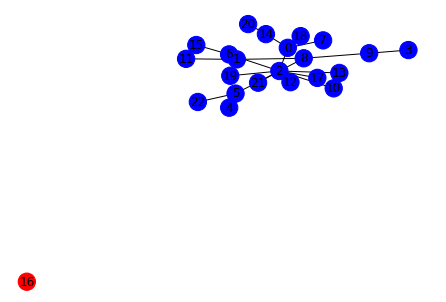

In [69]:
plot_Graph(mst_edge_list, node_labels)